# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [1]:
import numpy as np
clock_size = 5  # i
T = 86400 * 30
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

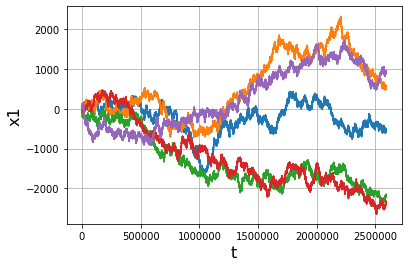

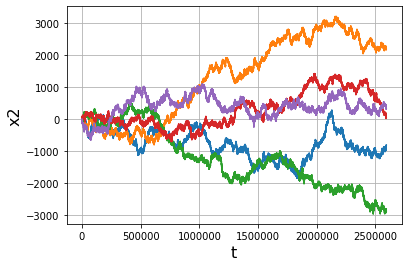

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta1 = 1
delta2 = 1
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size
# Create an empty array to store the realizations.
x1 = np.empty((m,N+1))
x2 = np.empty((m,N+1))
# Initial values of x, x0
x1[:, 0] = 0
x2[:, 0] = 0

brownian(x1[:,0], N, dt, delta1, out=x1[:,1:])
brownian(x2[:,0], N, dt, delta2, out=x2[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)

for k in range(m):
    plot(t_all, x1[k])
xlabel('t', fontsize=16)
ylabel('x1', fontsize=16)
grid(True)
show()

for k in range(m):
    plot(t_all, x2[k])
xlabel('t', fontsize=16)
ylabel('x2', fontsize=16)
grid(True)
show()

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x1[:,:-1]
w2_square_sum = x2[:,:-1]

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
print(w2_square_sum)

[[ 0.00000000e+00 -5.50290365e-02 -6.06777800e-01 ... -2.00273183e+09
  -2.00273265e+09 -2.00273348e+09]
 [ 0.00000000e+00 -9.84964788e-01 -3.07099990e+00 ...  3.33702786e+09
   3.33703005e+09  3.33703224e+09]
 [ 0.00000000e+00 -8.97032711e-01 -2.65179073e+00 ... -3.18756449e+09
  -3.18756737e+09 -3.18757026e+09]
 [ 0.00000000e+00  5.18216537e-01  1.42779420e-01 ...  7.32979164e+08
   7.32979202e+08  7.32979242e+08]
 [ 0.00000000e+00  2.47670200e-01  3.00476316e-01 ...  9.93170267e+08
   9.93170585e+08  9.93170901e+08]]


In [7]:
print(w1)

[[ 0.00000000e+00  7.10201015e-01 -4.52082418e-01 ... -5.18077948e+02
  -5.18903193e+02 -5.18442722e+02]
 [ 0.00000000e+00 -9.83050446e-01  4.81143213e-01 ...  5.76090571e+02
   5.75519934e+02  5.74967341e+02]
 [ 0.00000000e+00 -8.97516253e-01 -1.78101769e+00 ... -2.15505080e+03
  -2.15522817e+03 -2.15499297e+03]
 [ 0.00000000e+00  2.92728342e-01  3.17416361e-01 ... -2.33682769e+03
  -2.33776383e+03 -2.33977496e+03]
 [ 0.00000000e+00  1.79217647e-01  4.23967804e-01 ...  9.25897705e+02
   9.26368937e+02  9.26989431e+02]]


In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

In [9]:
print(x_t.shape)
print(x_t[0][0:100])

(5, 2592000)
[ 0.00000000e+00  7.24973812e-14 -1.97866507e-14 -9.55027613e-14
 -7.36206780e-14 -2.75862138e-14 -6.38972281e-15  2.65391198e-14
 -1.35863408e-14 -8.83345687e-14  6.20295530e-14  6.33770272e-14
  1.09857337e-13 -3.52273700e-14 -1.34551657e-13 -1.30448918e-13
 -1.23175751e-13 -1.02710235e-13 -1.57902981e-13 -1.66121801e-14
 -5.25286244e-14  3.27333860e-14  4.00359848e-14  2.16416322e-15
 -8.31634921e-14 -1.96142157e-13 -2.81264602e-13 -2.61542961e-13
 -1.96624190e-13 -2.30484504e-13 -1.65634550e-13 -1.52432920e-13
 -1.52276396e-13 -1.73371779e-13 -1.71644588e-13 -1.01362136e-13
 -1.67160045e-13 -1.75461311e-13 -2.02175422e-13 -2.01573281e-13
 -8.70153846e-14 -9.26715003e-14 -5.93247804e-14 -8.22785896e-14
 -6.54505897e-14  8.08172786e-14  1.57574810e-13  7.72489175e-14
  5.66240139e-14  1.00447603e-13  1.52267831e-13  2.78018192e-13
  1.54758198e-13  2.05288804e-13 -2.13373814e-14 -1.74908295e-13
 -2.47114355e-13 -2.43900973e-13 -2.48136799e-13 -1.30355150e-13
 -2.00548450

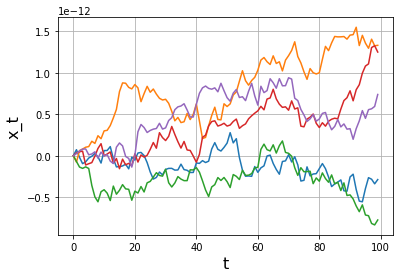

In [10]:
for k in range(x_t.shape[0]):
    plot(t[0:100], x_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [11]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

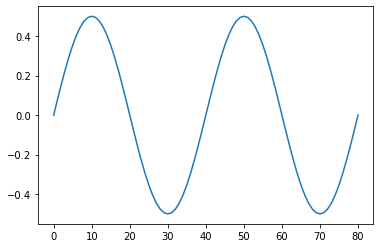

In [12]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

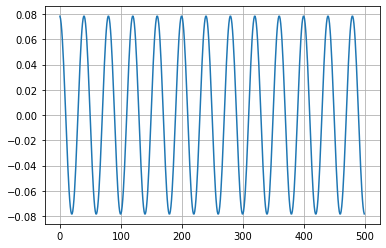

In [13]:
dx = np.diff(x_t)
dT = np.diff(delta_T)

plot(t[0:500], dT[0:500])
grid(True)
show()

Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

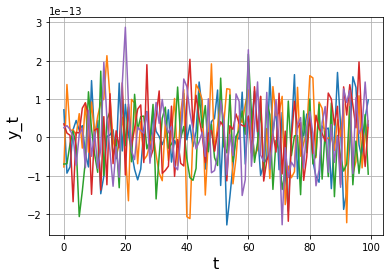

In [14]:
for k in range(Y_t.shape[0]):
    #plot(t[:-1], Y_t[k])
    plot(t[0:100], Y_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('y_t', fontsize=16)
grid(True)
show()

#### 2.4 保存模拟数据

In [15]:
with open('simulated_data.npy', 'wb') as f:
    np.save(f, Y_t)
print("Simulated Data saved as 'simulated_data.npy'")

Simulated Data saved as 'simulated_data.npy'


#### 3. 计算Gamma，并绘制 figure 3

#### 3.1 每两台钟，做差并计算allan variance

In [16]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [2.15458617e-13 1.07742486e-13 5.39276169e-14 2.69132807e-14
 1.34665351e-14 6.69414219e-15 3.36123401e-15 1.70572447e-15
 8.46415386e-16 4.30866708e-16 2.10384401e-16 1.00314845e-16
 5.44348984e-17 2.69670397e-17 1.46137008e-17 7.19060756e-18
 4.07015198e-18 1.46999830e-18 6.65145821e-19 1.31927255e-19]


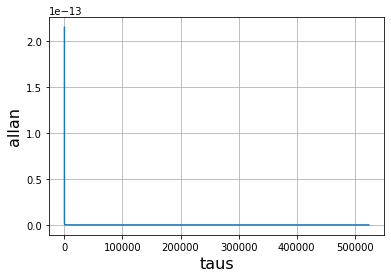

In [17]:
delta_01 = Y_t[0] - Y_t[1]
# Calculate Allan variance
(taus, adevs_01, errors, ns) = allantools.adev(delta_01)
print('taus - %s, adevs - %s' % (taus, adevs_01))

plot(taus, adevs_01)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [2.15488594e-13 1.07757423e-13 5.38557425e-14 2.68580141e-14
 1.35116496e-14 6.70043170e-15 3.34153788e-15 1.69814334e-15
 8.35030933e-16 4.26838393e-16 2.11884373e-16 1.03589810e-16
 5.26775164e-17 2.50286483e-17 1.34653217e-17 6.29991939e-18
 2.89327276e-18 1.58109672e-18 9.17833870e-19 1.33575656e-19]


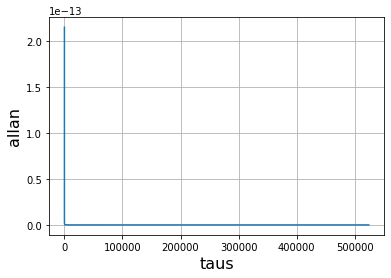

In [18]:
delta_02 = Y_t[0] - Y_t[2]
# Calculate Allan variance
(taus, adevs_02, errors, ns) = allantools.adev(delta_02)
print('taus - %s, adevs - %s' % (taus, adevs_02))

plot(taus, adevs_02)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [2.15497557e-13 1.07734796e-13 5.39250489e-14 2.69423184e-14
 1.34354629e-14 6.69675758e-15 3.35957693e-15 1.69849930e-15
 8.44541030e-16 4.25775977e-16 2.16141720e-16 1.03795970e-16
 5.13988831e-17 2.79631955e-17 1.20152264e-17 6.08723522e-18
 2.66378635e-18 1.28545148e-18 4.23539282e-19 1.44021460e-19]


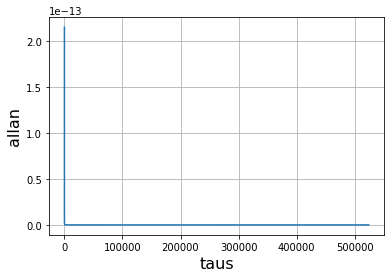

In [19]:
delta_12 = Y_t[1] - Y_t[2]
# Calculate Allan variance
(taus, adevs_12, errors, ns) = allantools.adev(delta_12)
print('taus - %s, adevs - %s' % (taus, adevs_12))

plot(taus, adevs_12)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

#### 3.2 每三台钟，换算一台钟的allan variance，依据公式（3），（4）

In [20]:
# TODO

#### 3.3 每两台钟，换算相关性C，依据公式（5）

In [21]:
# TODO

#### 3.4 计算Gamma，并绘图

In [22]:
# TODO